In [1]:
from sklearn import datasets

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('../Data/global-2-1.csv')

In [4]:
df.shape[1] #nr of columns

32

In [5]:
df.shape[0] #nr of entries

3200

In [6]:
X = df.drop(['MAP_ID', 'RISK_ZONE_ID'], axis=1).values

In [7]:
y = df.loc[:,'RISK_ZONE_ID'].values

In [8]:
y

array([1, 2, 1, ..., 3, 1, 1])

In [9]:
#split intro train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [10]:
# training a Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [77]:
clf = RandomForestClassifier(n_estimators=1800, random_state=0).fit(X_train, y_train) 

In [78]:
y_pred = clf.predict(X_test)

In [79]:
accuracy = clf.score(X_test, y_test)

In [80]:
accuracy

0.88625

In [81]:
cm = confusion_matrix(y_test, y_pred)

In [82]:
cm

array([[277,  11,   0,   0,   0],
       [ 14, 139,  11,   0,   0],
       [  1,  19, 171,  19,   0],
       [  0,   0,  14, 116,   0],
       [  0,   0,   0,   2,   6]])

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df['risk_zone_nb']=df['RISK_ZONE_ID'].factorize()[0]
risk_zone_nb_df = df[['RISK_ZONE_ID','risk_zone_nb']].drop_duplicates().sort_values('risk_zone_nb')

nb_to_riskzone = dict(risk_zone_nb_df[['risk_zone_nb', 'RISK_ZONE_ID']]).values

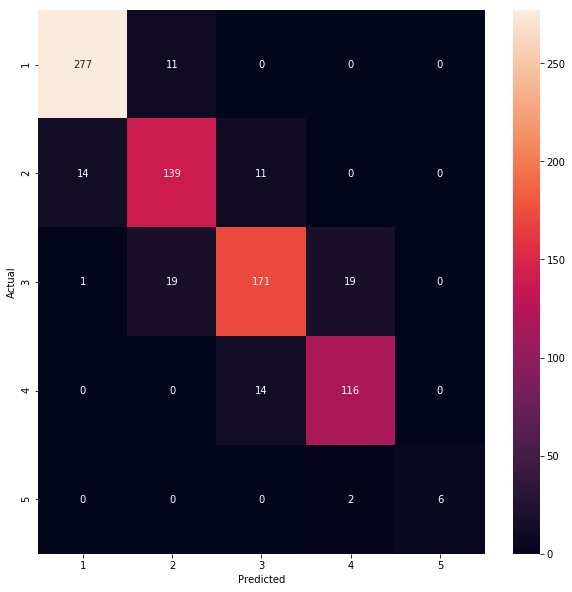

In [85]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=risk_zone_nb_df.RISK_ZONE_ID.values, yticklabels=risk_zone_nb_df.RISK_ZONE_ID.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [86]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.96      0.96       288
           2       0.82      0.85      0.83       164
           3       0.87      0.81      0.84       210
           4       0.85      0.89      0.87       130
           5       1.00      0.75      0.86         8

   micro avg       0.89      0.89      0.89       800
   macro avg       0.90      0.85      0.87       800
weighted avg       0.89      0.89      0.89       800



### support is the number of actual occurences of the class in the test data set. Imbalanced support in the training data may indicate the need for stratified sampling or rebalancing.
micro-average is preferable if there is a class imbalance problem. The micro-average is used in unbalanced datasets as this method takes the frequency of each class into consideration.
The micro-avg precision, recall and f1-score are mathematically equivalent

In [87]:
print('Cohen-Kappa score: ',metrics.cohen_kappa_score(y_test, y_pred))

Cohen-Kappa score:  0.8448323635356054
